# Phase 1:
## 1. Data Wrangling & EDA


##1.2. Install Required Libraries

In [ ]:
!pip install datasets pandas matplotlib

## 1.3. Load the Amazon Reviews Data

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load a subset (e.g., 10,000 rows for speed)
ds = load_dataset("amazon_polarity", split="train[:10000]")
df = pd.DataFrame(ds)
df.head()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/260M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/254M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/117M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400000 [00:00<?, ? examples/s]

,label,title,content
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [ ]:
print(df['label'].value_counts())


label
0    5097
1    4903
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

label      0
title      0
content    0
dtype: int64


In [ ]:
df[['label', 'title', 'content']].sample(5)


,label,title,content
4057,0,A total dud,"Opened the box, unrolled the mattress, plugged..."
656,1,Great product,Just what I needed to get me headed back towar...
728,1,Hypatia,A classic story based on history. One of Hypat...
3637,0,Glad I have prime and it was free,Wife is a huge cage fan...This was torcher to ...
7928,0,One word: TRIPE,I see a lot of glowing reviews for this movie ...


In [ ]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df[['word_count']].describe()


,word_count
count,10000.000000
mean,75.228500
std,42.519171
min,7.000000
25%,40.000000
50%,66.000000
75%,104.000000
max,206.000000


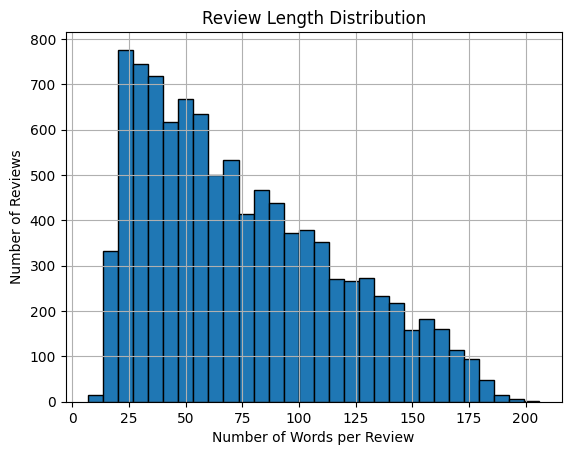

In [ ]:
import matplotlib.pyplot as plt

df['word_count'].hist(bins=30, edgecolor='black')
plt.xlabel('Number of Words per Review')
plt.ylabel('Number of Reviews')
plt.title('Review Length Distribution')
plt.show()


In [ ]:
from collections import Counter

all_words = ' '.join(df['content']).lower().split()
common_words = Counter(all_words).most_common(20)
print("Top 20 words:", common_words)


Top 20 words: [('the', 38834), ('and', 20446), ('i', 19404), ('a', 19049), ('to', 18568), ('of', 15937), ('this', 14100), ('is', 13837), ('it', 13267), ('in', 9321), ('that', 7745), ('for', 7610), ('was', 7124), ('you', 5791), ('not', 5360), ('but', 5314), ('with', 5273), ('on', 5031), ('have', 4709), ('my', 4669)]


In [ ]:
df.to_csv("amazon_reviews_raw.csv", index=False)
from google.colab import files
files.download("amazon_reviews_raw.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['clean_content'] = df['content'].str.lower()


In [ ]:
import string
df['clean_content'] = df['clean_content'].str.translate(str.maketrans('', '', string.punctuation))


In [ ]:
df['clean_content'] = df['clean_content'].str.replace(r'\d+', '', regex=True)


In [ ]:
df['clean_content'] = df['clean_content'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['clean_content'] = df['clean_content'].apply(remove_stopwords)


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# For demo speed, do just first 1,000 rows
df.loc[:999, 'clean_content'] = df.loc[:999, 'clean_content'].apply(lemmatize)


In [ ]:
df = df[df['clean_content'].str.split().str.len() > 3]
print("After removing short reviews:", df.shape)


After removing short reviews: (9998, 5)


In [ ]:
df[['content', 'clean_content']].sample(5)


,content,clean_content
1768,do not buy The Great Indian Wars. the same hol...,buy great indian wars hollywood movie stock pl...
5558,"THIS TOY IS THE BOMB!this toy has the looks, g...",toy bombthis toy looks graphics talentseven th...
6583,"Normally, I would never buy anything from Harm...",normally would never buy anything harman kardo...
1650,I got nothing out of this book. I've read many...,got nothing book ive read many selfhelp books ...
666,It's pretty awesome for such a price! It defin...,pretty awesome price definitely give great pos...


In [ ]:
df.to_csv("amazon_reviews_cleaned.csv", index=False)
from google.colab import files
files.download("amazon_reviews_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split

X = df['clean_content']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)


LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8345
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1024
           1       0.84      0.82      0.83       976

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

Confusion Matrix:
 [[872 152]
 [179 797]]


In [ ]:
import joblib

joblib.dump(clf, "logreg_model.joblib")
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
from google.colab import files
files.download("logreg_model.joblib")
files.download("tfidf_vectorizer.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

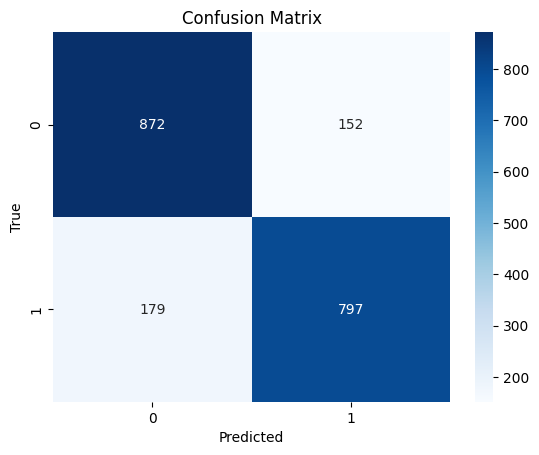

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install transformers datasets scikit-learn


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving amazon_reviews_cleaned.csv to amazon_reviews_cleaned.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/amazon_reviews_cleaned.csv')
df = df.dropna(subset=['clean_content', 'label'])  # Just in case

In [ ]:
df.head()

,label,title,content,word_count,clean_content
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,75,sound track beautiful paint senery mind well w...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,91,I m read lot review say good game soundtrack f...
2,1,Amazing!,This soundtrack is my favorite music of all ti...,128,soundtrack favorite music time hand intense sa...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,116,truly like soundtrack enjoy video game music p...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",77,you ve play game know divine music every singl...


In [ ]:
df = df.rename(columns={'clean_content': 'text'})
df = df[['text', 'label']]
df = df[df['text'].str.strip().astype(bool)]  # Remove empty rows


In [ ]:
df.head()

,text,label
0,sound track beautiful paint senery mind well w...,1
1,I m read lot review say good game soundtrack f...,1
2,soundtrack favorite music time hand intense sa...,1
3,truly like soundtrack enjoy video game music p...,1
4,you ve play game know divine music every singl...,1


In [ ]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(),
    df['label'].tolist(),
    test_size=0.2,
    random_state=42
)

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased"  # Or "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Tokenize (batched for speed)
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
import torch

class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels)
val_dataset = ReviewDataset(val_encodings, val_labels)


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [ ]:

# OPTIONAL: Use only a small subset for quick testing (e.g., first 2000 samples)
small_train_dataset = torch.utils.data.Subset(train_dataset, range(2000))
small_val_dataset = torch.utils.data.Subset(val_dataset, range(500))

from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,  # Only 1 epoch for speed
    per_device_train_batch_size=16,  # Bigger batch = faster (if you have GPU memory)
    per_device_eval_batch_size=32,   # Same for eval
    eval_strategy="epoch",
    save_strategy="no",  # Don't save checkpoints
    logging_dir='./logs',
    logging_steps=100,   # Log less frequently
    report_to=[],        # Turn off all reporting (no wandb, no tensorboard)
    disable_tqdm=False,  # Progress bar (set True if it slows down Colab)
    fp16=True if torch.cuda.is_available() else False,  # Mixed precision on GPU
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,  # Use subset
    eval_dataset=small_val_dataset,     # Use subset
)

trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.564000,0.419389


TrainOutput(global_step=125, training_loss=0.5419534454345704, metrics={'train_runtime': 1287.892, 'train_samples_per_second': 1.553, 'train_steps_per_second': 0.097, 'total_flos': 66233699328000.0, 'train_loss': 0.5419534454345704, 'epoch': 1.0})

In [ ]:
trainer.evaluate()


{'eval_loss': 0.41938909888267517,
 'eval_runtime': 87.6312,
 'eval_samples_per_second': 5.706,
 'eval_steps_per_second': 0.183,
 'epoch': 1.0}

In [ ]:
import numpy as np

preds = trainer.predict(val_dataset)
y_pred = np.argmax(preds.predictions, axis=1)
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(val_labels, y_pred))
print(confusion_matrix(val_labels, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1024
           1       0.80      0.84      0.82       976

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

[[824 200]
 [157 819]]


In [ ]:
model.save_pretrained("./finetuned_distilbert")
tokenizer.save_pretrained("./finetuned_distilbert")
